In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('BC_College_Data.csv')

/Users/ayusharora/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (12,16,23,33,38,41,75,76,77,83) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
# Number of Pitches

len(df)

504775

In [4]:
# Reduce Data to Balls in Play only:

batted_balls = df.dropna(subset = ['distance','launch_angle','exit_velocity','hang_time','direction','pitcher_handedness','batter_handedness','hit','play_result','pitcher_handedness','batter_handedness'])

balls_in_play = batted_balls.loc[batted_balls['direction'].abs() <=45]
balls_in_play = balls_in_play.loc[balls_in_play['hit'] == 't']
balls_in_play = balls_in_play.loc[balls_in_play['batter_handedness'] != 'Undefined']
balls_in_play = balls_in_play.loc[balls_in_play['pitcher_handedness'] != 'Undefined']
balls_in_play = balls_in_play[(balls_in_play['play_result'] != 'Undefined')]
balls_in_play = balls_in_play[(balls_in_play['play_result'] != 'HomeRun')]
balls_in_play = balls_in_play[(balls_in_play['play_result'] != 'Sacrifice')]
balls_in_play = balls_in_play[(balls_in_play['play_result'] !=  'FieldersChoice')]
balls_in_play = balls_in_play[(balls_in_play['play_result'] != 'Error')]
balls_in_play = balls_in_play[(balls_in_play['play_result'] != 'BP')]
balls_in_play = balls_in_play[(balls_in_play['hit_type'] != 'Bunt')]

len(balls_in_play)

43921

In [5]:
# Number of Unique Batters:

len(balls_in_play['batter_name'].unique())

2977

In [6]:
# Numerical Conversion of pitcher/batter handedness:

balls_in_play.loc[(balls_in_play['pitcher_handedness'] == 'R'), 'pitcher_handedness'] = 1

balls_in_play.loc[(balls_in_play['pitcher_handedness'] == 'L'), 'pitcher_handedness'] = 0

balls_in_play.loc[(balls_in_play['batter_handedness'] == 'R'), 'batter_handedness'] = 1

balls_in_play.loc[(balls_in_play['batter_handedness'] == 'L'), 'batter_handedness'] = 0



In [7]:
# Convert text columns to integer:

balls_in_play['pitcher_handedness'] = balls_in_play['pitcher_handedness'].astype(int)
balls_in_play['batter_handedness'] = balls_in_play['pitcher_handedness'].astype(int)

In [8]:
balls_in_play.to_csv('balls_in_play.csv')

In [9]:
training_data = balls_in_play.select_dtypes(include = ['int64', 'float64'])

In [10]:
training_data['play_result'] = balls_in_play['play_result']

<ipython-input-10-b7bfcd64a603>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_data['play_result'] = balls_in_play['play_result']


In [11]:
training_data.loc[(training_data['play_result'] != 'Out'), 'play_result'] = 1
training_data.loc[(training_data['play_result'] == 'Out'), 'play_result'] = 0

training_data['play_result'] = training_data['play_result'].astype(int)

/Users/ayusharora/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
<ipython-input-11-5f72e98d0a67>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_data['play_result'] = training_data['play_result'].astype(int)


In [12]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43921 entries, 26 to 455860
Data columns (total 55 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id_6digit                  43921 non-null  int64  
 1   pitcher_datraks_id         23358 non-null  float64
 2   batter_datraks_id          25223 non-null  float64
 3   csv_manager_id             43921 non-null  int64  
 4   pitch_number               43921 non-null  float64
 5   plate_appearance           43921 non-null  float64
 6   pitch_of_plate_appearance  43921 non-null  float64
 7   pitcher_handedness         43921 non-null  int64  
 8   batter_handedness          43921 non-null  int64  
 9   inning                     43921 non-null  float64
 10  outs                       43921 non-null  float64
 11  strikes                    43921 non-null  float64
 12  outs_on_play               43921 non-null  float64
 13  runs_scored                43921 non-null  f

In [13]:
training_data = training_data.drop(columns = ['id_6digit',
                             'pitcher_datraks_id',
                             'batter_datraks_id',
                             'csv_manager_id',
                             'pitch_number',
                             'plate_appearance',
                             'pitch_of_plate_appearance',
                             'outs_on_play',
                             'runs_scored',
                             'tc_event_id',
                             'tc_team_id_2',
                             'id',
                             'dk_coach_id',
                             'id_3',
                             'description',
                             'tc_team_id'])

In [14]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43921 entries, 26 to 455860
Data columns (total 39 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pitcher_handedness        43921 non-null  int64  
 1   batter_handedness         43921 non-null  int64  
 2   inning                    43921 non-null  float64
 3   outs                      43921 non-null  float64
 4   strikes                   43921 non-null  float64
 5   velocity                  43879 non-null  float64
 6   vertical_release_angle    43879 non-null  float64
 7   horizontal_release_angle  43879 non-null  float64
 8   spin_rate                 43187 non-null  float64
 9   release_height            43875 non-null  float64
 10  extension                 43710 non-null  float64
 11  vertical_break            43806 non-null  float64
 12  induced_vertical_break    43765 non-null  float64
 13  horizontal_break          43768 non-null  float64
 14  heig

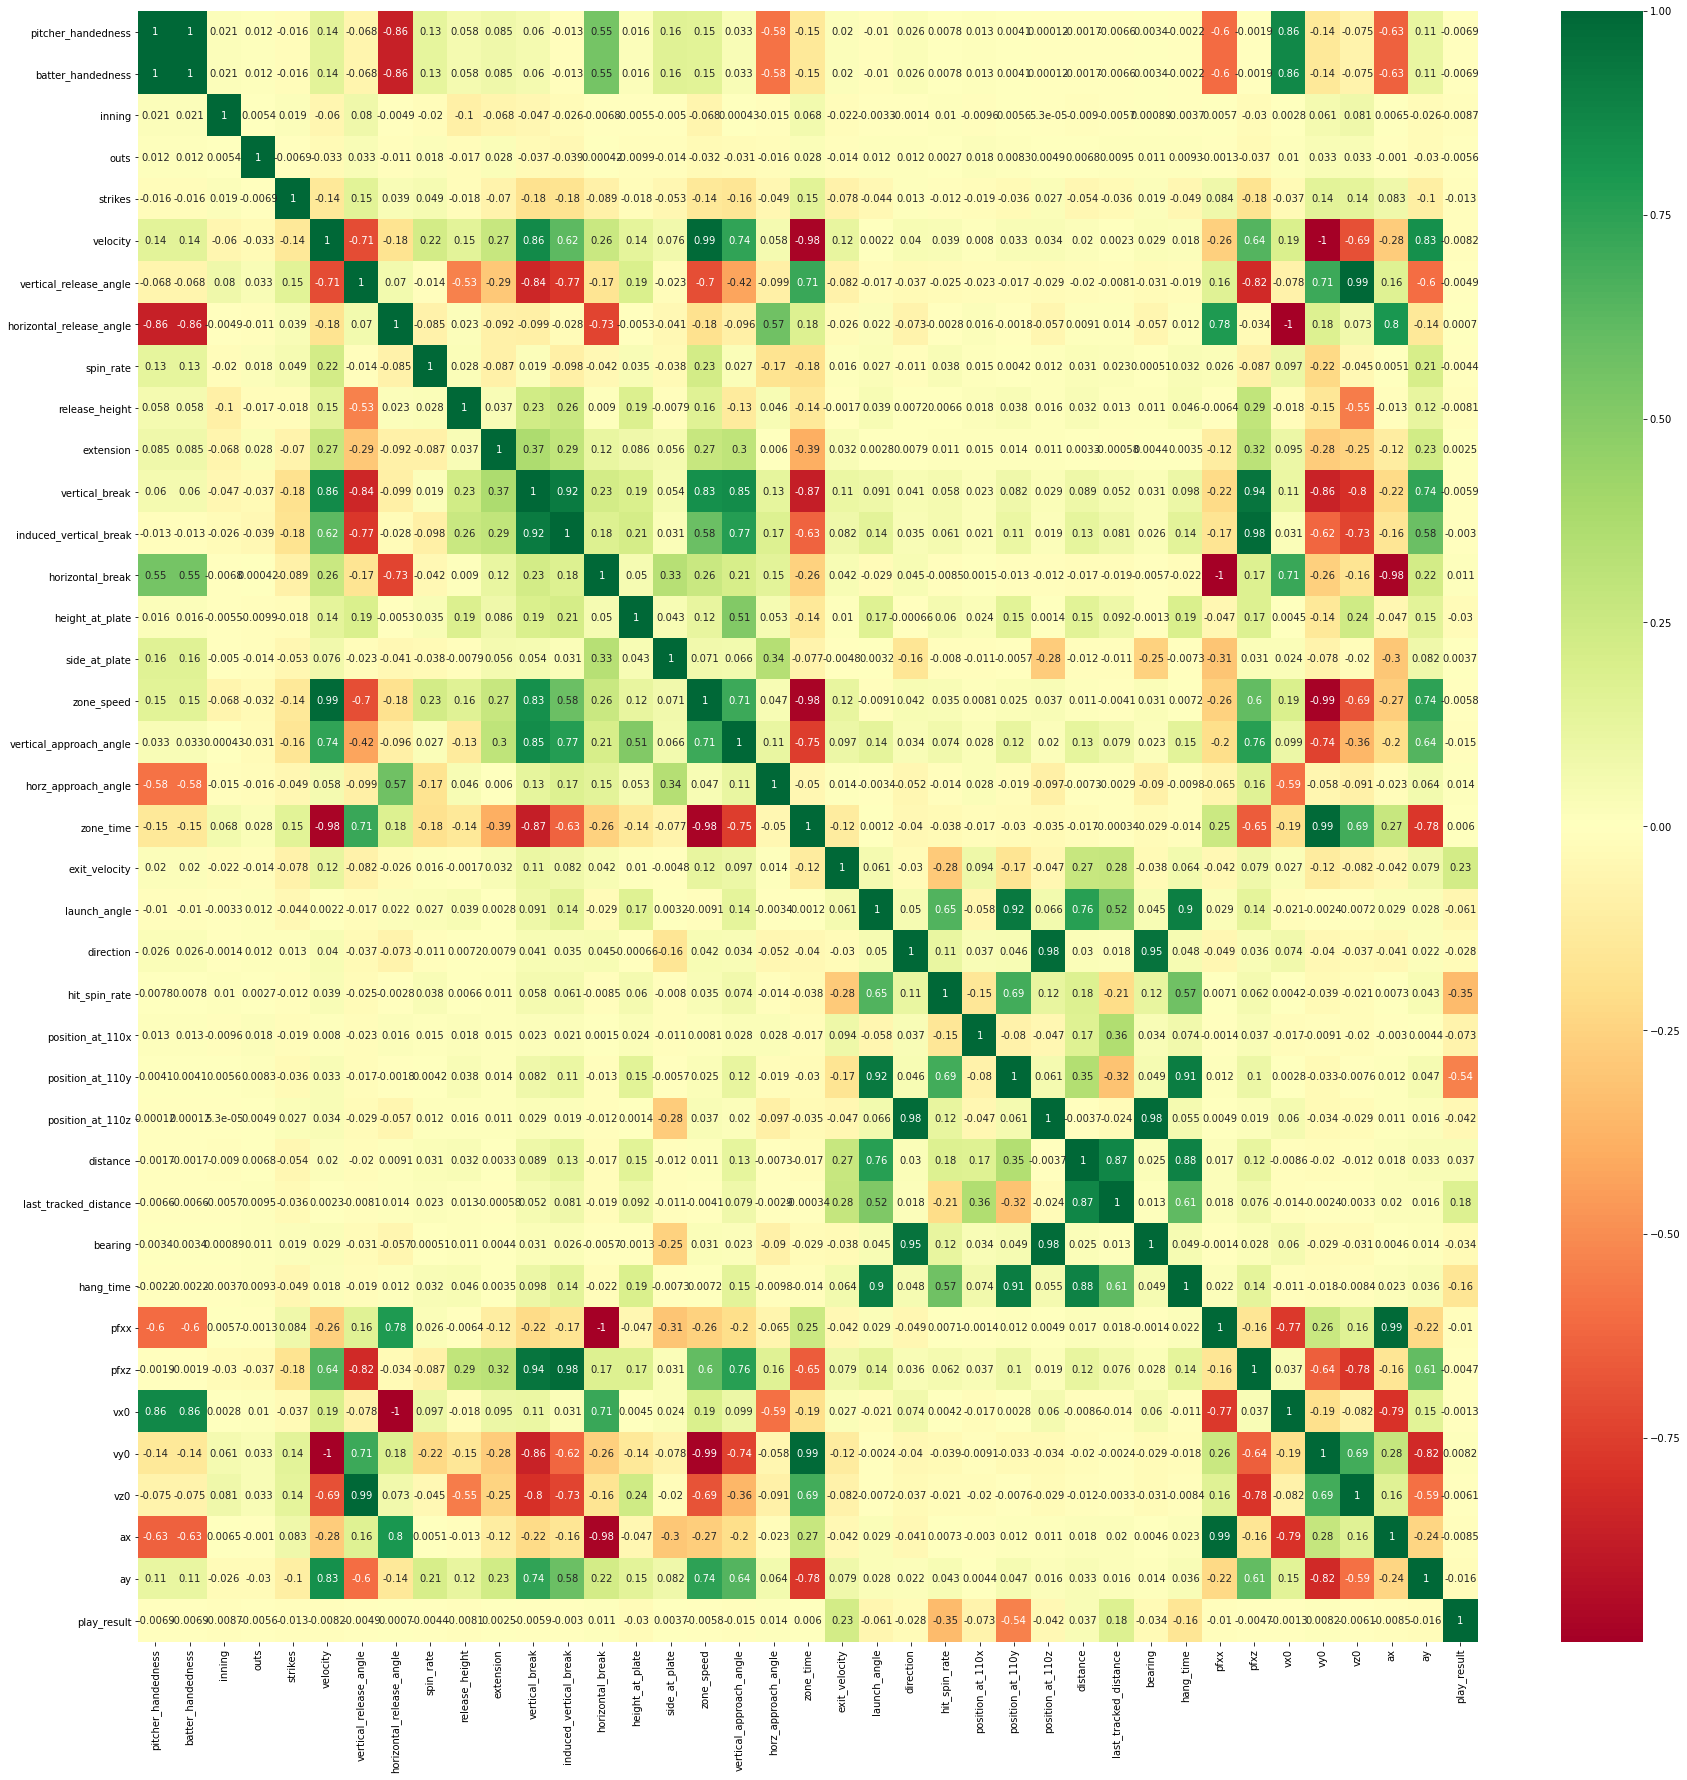

In [15]:
corrmat = training_data.corr()
top_corr_features = corrmat.index
plt.figure(figsize = (30,30))
g = sns.heatmap(training_data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [16]:
training_data.insert(0, 'batter_name', balls_in_play['batter_name'])

In [17]:
training_data['play_result'].value_counts(normalize=True)*100

0    64.142438
1    35.857562
Name: play_result, dtype: float64

In [18]:
batters = training_data.groupby("batter_name", as_index=False)

In [24]:
batter_dict = dict(iter(batters))

In [36]:
sorted = []
maximum = 0
summation = 0
for batter in batter_dict:

        length = len(batter_dict[batter])
        summation += length
        if length > maximum:
            sorted.append(batter)
            player = batter
            maximum = length
    
summation/len(batter_dict)

14.753443063486731

In [37]:
sorted

['Abello, Carlos',
 'Abinanti, Peter',
 'Acker, Joe',
 'Acton, Cory',
 'Aiello, John',
 'Bell, Austin',
 'Beloso, Cade',
 'Seymour, Bobby']

In [ ]:
print(str(player) + " has most balls in play: " + str(maximum))

In [ ]:
Seymour_Bobby = batter_dict['Seymour, Bobby']

In [ ]:
Seymour_Bobby

In [ ]:
training_data.to_csv("training_data.csv")

In [ ]:
training_data['batter_name'].value_counts(normalize=True)*100